# PROJET ML BONUS


## Predicting Car Prices: A Data-driven Approach

In our analysis, we set out to predict the 'Price_in_thousands' column, representing the price values in thousands of dollars.

### Why this Column?

The choice of predicting the 'Price_in_thousands' column stems from its significant relevance to our study. It exhibits the highest correlation with other variables in our dataset, making it a pivotal factor for our predictive modeling. Consequently, we opted to employ a linear regression approach for forecasting this particular column.

### Methodology Overview

1. **Data Splitting:**
   We initiated our analysis by performing a train-test split, segregating our dataset into two distinct parts — one for training purposes and the other for testing the model's predictive performance.

2. **Feature Encoding:**
   Subsequently, a one-hot encoding technique was applied to the dataset, enhancing the representation of categorical variables in our predictive models.

3. **Model Selection and instantiation:**
   We instantiated two regression models, namely Support Vector Regressor (SVR) and Random Forest Regressor, to capture diverse aspects of the underlying patterns within the data.

4. **Model Training:**
   Following the instantiation, we proceeded to train both the SVR and Random Forest models on the training dataset.

5. **Prediction Phase:**
   Post-training, the models were employed to make predictions on the test dataset, allowing us to assess their efficacy in forecasting the 'Price_in_thousands' column.

Our approach aims to leverage the strengths of these regression models to gain insights into the intricate relationships within the dataset, ultimately providing a robust foundation for predicting car prices.

# 1. Data pre-processing

Encoding, normalization, imputation…

## 1.1 Load Dataset

In [30]:
import pandas as pd
data = pd.read_csv("Car_sales.csv", sep = ',', header= None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
1,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.28014952
2,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.37077766
3,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225,106.9,70.6,192,3.47,17.2,26,1/4/2012,NaN
4,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3/10/2011,91.38977933


In [31]:
data.columns = data.iloc[0] 
data = data.drop(data.index[0]) 
data.reset_index(drop=True, inplace=True)

In [32]:
data.head(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.28014952
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.37077766
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225,106.9,70.6,192,3.47,17.2,26,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3/10/2011,91.38977933
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10/8/2011,62.7776392
5,Audi,A6,18.78,23.555,Passenger,33.95,2.8,200,108.7,76.1,192,3.561,18.5,22,8/9/2011,84.56510502
6,Audi,A8,1.38,39,Passenger,62,4.2,310,113,74,198.2,3.902,23.7,21,2/27/2012,134.6568582
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170,107.3,68.4,176,3.179,16.6,26,6/28/2011,71.19120671
8,BMW,328i,9.231,28.675,Passenger,33.4,2.8,193,107.3,68.5,176,3.197,16.6,24,1/29/2012,81.87706856
9,BMW,528i,17.527,36.125,Passenger,38.9,2.8,193,111.4,70.9,188,3.472,18.5,25,4/4/2011,83.9987238


In [33]:
data.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object', name=0)

## 1.2 Data Cleaning

In [34]:
data.shape

(157, 16)

- 152 lignes 
- 16 colonnes 

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Manufacturer         157 non-null    object
 1   Model                157 non-null    object
 2   Sales_in_thousands   157 non-null    object
 3   __year_resale_value  121 non-null    object
 4   Vehicle_type         157 non-null    object
 5   Price_in_thousands   155 non-null    object
 6   Engine_size          156 non-null    object
 7   Horsepower           156 non-null    object
 8   Wheelbase            156 non-null    object
 9   Width                156 non-null    object
 10  Length               156 non-null    object
 11  Curb_weight          155 non-null    object
 12  Fuel_capacity        156 non-null    object
 13  Fuel_efficiency      154 non-null    object
 14  Latest_Launch        157 non-null    object
 15  Power_perf_factor    155 non-null    object
dtypes: objec

### Descriptive statistics for our columns

In [107]:
data.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,0,152.000000
mean,53.359072,17.144671,27.331822,3.049342,184.809211,107.413816,71.088816,187.059211,3.376184,17.959211,23.842105,NaT,76.704153
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,NaT,23.276272
25%,13.714000,12.527500,17.888750,2.300000,147.500000,102.900000,68.375000,177.475000,2.964750,15.775000,21.000000,NaT,59.755537
50%,29.213000,14.180000,22.747000,3.000000,175.000000,107.000000,70.400000,186.650000,3.336000,17.200000,24.000000,NaT,71.514623
75%,68.069750,17.806250,31.938750,3.575000,211.250000,112.200000,73.100000,195.125000,3.821500,19.800000,26.000000,NaT,89.408406
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,NaT,188.144323
std,68.938380,10.301344,14.418669,1.049818,56.823152,7.717839,3.464666,13.471247,0.636593,3.937582,4.304788,NaN,25.180983


## 1.3 Data pre-processing: Imputation of missing data
We identify and summarize the count of missing values in each column of the DataFrame

In [39]:
data.isnull().sum()

0
Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

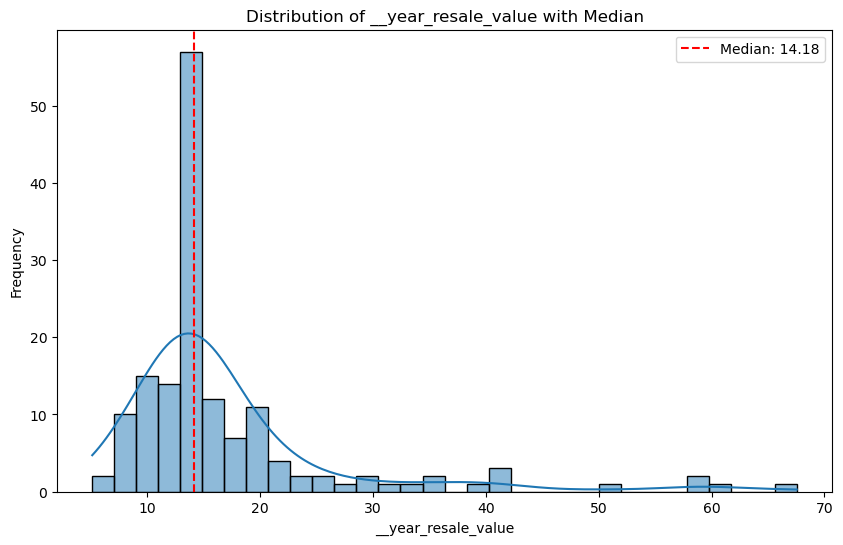

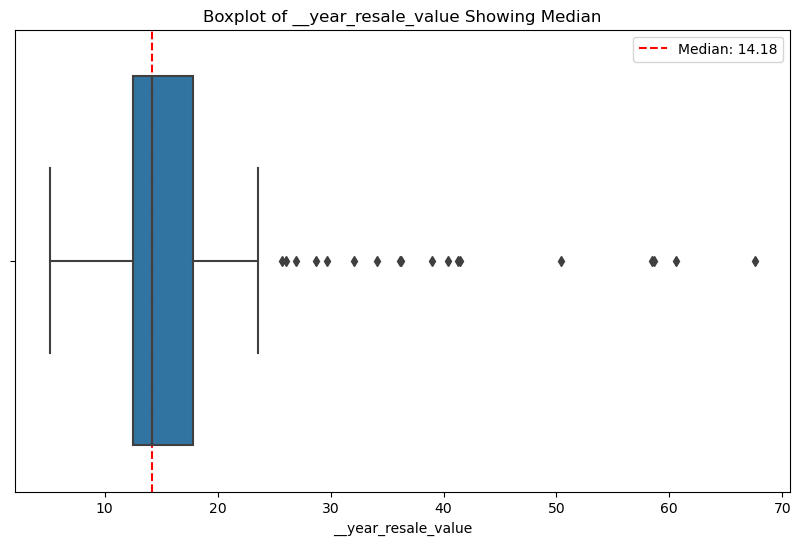

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
sns.histplot(data['__year_resale_value'], kde=True)
plt.axvline(data['__year_resale_value'].median(), color='red', linestyle='--', label='Median: {:.2f}'.format(data['__year_resale_value'].median()))
plt.title('Distribution of __year_resale_value with Median')
plt.xlabel('__year_resale_value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=data['__year_resale_value'], ax=ax)
ax.axvline(data['__year_resale_value'].median(), color='red', linestyle='--', label='Median: {:.2f}'.format(data['__year_resale_value'].median()))
ax.set_title('Boxplot of __year_resale_value Showing Median')
ax.set_xlabel('__year_resale_value')
ax.legend()
plt.show()

In [42]:
median_resale_value = data['__year_resale_value'].median()
data['__year_resale_value'].fillna(median_resale_value, inplace=True)

### Justification for Choosing the Median:

#### Skewness of the Distribution:
The choice of the median is particularly justified in cases where the distribution of the data is skewed. Unlike the mean, which can be significantly influenced by extreme values, the median is robust to the asymmetry in the distribution. It accurately represents the central tendency, providing a more reliable measure when dealing with non-normally distributed data.

#### Presence of Outliers:
In scenarios where outliers, represented by points beyond the whiskers of a box plot, are present in the dataset, the median becomes a preferred measure of central tendency. Outliers can exert a substantial impact on the mean, pulling it towards extreme values. The median, being less sensitive to extreme observations, offers a more resilient estimate of the central position. It is less influenced by outliers, making it a suitable choice for summarizing the data when there are indications of significant outliers.

In summary, the selection of the median is a prudent strategy when addressing skewed distributions and the presence of outliers, as it provides a more robust and representative measure of central tendency under these circumstances.


In [43]:
data.isnull().sum()

0
Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     2
Engine_size            1
Horsepower             1
Wheelbase              1
Width                  1
Length                 1
Curb_weight            2
Fuel_capacity          1
Fuel_efficiency        3
Latest_Launch          0
Power_perf_factor      2
dtype: int64

In [44]:
import pandas as pd

columns_with_potential_nans = [
    'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
    'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor'
]

data = data.dropna(subset=columns_with_potential_nans)

data.isnull().sum()

0
Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

### Data Type Conversion for All Variables

Moving forward, our next step involves converting the data types of all variables within the dataset.

This process is crucial for ensuring uniformity and compatibility in our analysis. By standardizing the data types, we aim to enhance the accuracy and reliability of our predictive models. The consistency in data types facilitates seamless operations and computations, allowing us to derive meaningful insights from the entirety of the dataset.

Stay tuned as we delve into this essential phase of our analysis, bringing us closer to a comprehensive and well-prepared dataset for further exploration and modeling.


In [45]:
data_types = {
    'Manufacturer': 'string',
    'Model': 'string',
    'Sales_in_thousands': 'float',
    '__year_resale_value': 'float',
    'Vehicle_type': 'string',
    'Price_in_thousands': 'float',
    'Engine_size': 'float',
    'Horsepower': 'int',
    'Wheelbase': 'float',
    'Width': 'float',
    'Length': 'float',
    'Curb_weight': 'float',
    'Fuel_capacity': 'float',
    'Fuel_efficiency': 'float',
    'Power_perf_factor': 'float'
}

data = data.astype(data_types)


In [46]:
data['Latest_Launch'] = pd.to_datetime(data['Latest_Launch'], errors='coerce', format='%Y-%m-%d %H:%M:%S')


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Manufacturer         152 non-null    string        
 1   Model                152 non-null    string        
 2   Sales_in_thousands   152 non-null    float64       
 3   __year_resale_value  152 non-null    float64       
 4   Vehicle_type         152 non-null    string        
 5   Price_in_thousands   152 non-null    float64       
 6   Engine_size          152 non-null    float64       
 7   Horsepower           152 non-null    int32         
 8   Wheelbase            152 non-null    float64       
 9   Width                152 non-null    float64       
 10  Length               152 non-null    float64       
 11  Curb_weight          152 non-null    float64       
 12  Fuel_capacity        152 non-null    float64       
 13  Fuel_efficiency      152 non-null    flo

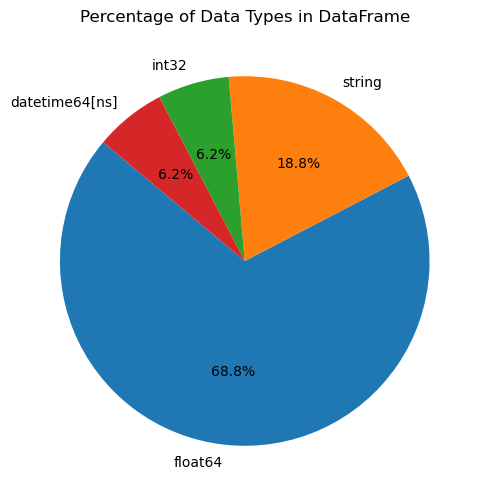

In [14]:
data_types = data.dtypes.value_counts()
plt.figure(figsize=(8, 6))
data_types.plot.pie(autopct='%1.1f%%', startangle=140)
plt.ylabel('') 
plt.title('Percentage of Data Types in DataFrame')
plt.show()

### Check unique values by categorical columns 

In [48]:
for col in data.select_dtypes(include=['object']).columns:
    print(f"{col}: {data[col].unique()}")

### Let's check for duplicates in the DataFrame

In [55]:
data.duplicated()

0      False
1      False
3      False
4      False
5      False
       ...  
152    False
153    False
154    False
155    False
156    False
Length: 152, dtype: bool

## 1.4 Data pre-processing: Normalizing Data

The StandardScaler is typically used to normalize continuous features

In [56]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()

data_normalized = scaler.fit_transform(data.select_dtypes(include=[np.number]))

data_normalized = pd.DataFrame(data_normalized, columns=data.select_dtypes(include=[np.number]).columns)

data_normalized.head(10)

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,-0.530336,-0.076424,-0.405800,-1.193989,-0.791180,-0.807785,-1.097174,-1.091782,-1.161844,-1.212659,0.969070,-0.734082
1,-0.203388,0.265922,0.074328,0.143983,0.709634,0.089203,-0.228427,0.435008,0.221934,-0.193449,0.269868,0.584374
2,-0.651583,1.225269,1.020668,0.430691,0.444785,0.934192,0.090113,0.710575,0.746760,0.010393,-0.429335,0.585131
3,-0.479719,0.497724,-0.232537,-1.193989,-0.614614,-0.625788,-0.836550,-0.674708,-0.596040,-0.397291,0.736002,-0.554885
4,-0.503252,0.624338,0.460518,-0.238295,0.268218,0.167202,1.451150,0.367978,0.291280,0.137795,-0.429335,0.313210
5,-0.756486,2.128613,2.412344,1.099678,2.210448,0.726194,0.843027,0.829739,0.828715,1.462768,-0.662402,2.309055
6,-0.489179,-0.288746,-0.023785,-0.525003,-0.261481,-0.014796,-0.778633,-0.823663,-0.310773,-0.346330,0.502935,-0.219657
7,-0.642225,1.123004,0.422247,-0.238295,0.144622,-0.014796,-0.749675,-0.823663,-0.282404,-0.346330,0.036800,0.206109
8,-0.521488,1.848601,0.804958,-0.238295,0.144622,0.518197,-0.054678,0.070068,0.151011,0.137795,0.269868,0.290643
9,0.555978,-0.454806,-0.372748,0.048413,-0.173198,0.206201,0.466570,0.561620,-0.012899,-0.117008,0.269868,-0.220045


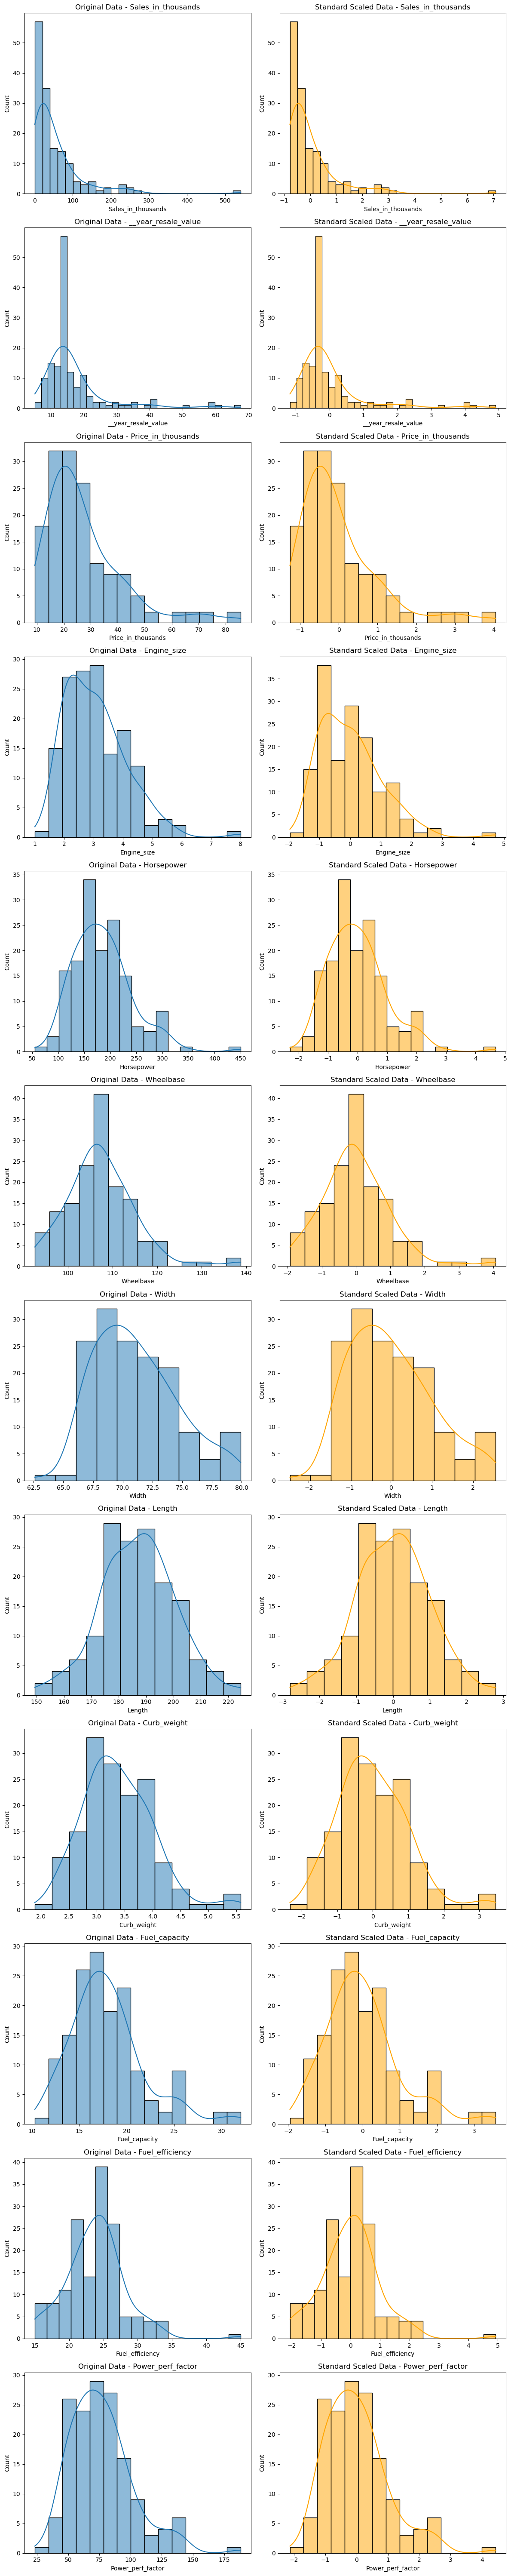

In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = data.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data[numeric_cols])
data_normalized = pd.DataFrame(data_normalized, columns=numeric_cols)

num_cols = len(numeric_cols)

fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(12, 5 * num_cols))

for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Original Data - {col}')
    
    sns.histplot(data_normalized[col], ax=axes[i, 1], kde=True, color='orange')
    axes[i, 1].set_title(f'Standard Scaled Data - {col}')

plt.tight_layout()
plt.show()


## 1.5 Data pre-processing: Data Encoding

### Applying One-Hot Encoding to Categorical Variables

In the ongoing refinement of our dataset, we are now implementing the one-hot encoding technique specifically for categorical variables.

One-hot encoding transforms categorical variables into a binary matrix format, where each category is represented as a binary column. This method is instrumental in ensuring that our machine learning models effectively interpret and utilize categorical information during the analysis.

By encoding categorical variables in this manner, we enhance the model's ability to discern patterns and relationships within the data, ultimately contributing to the accuracy and robustness of our predictive models.

Stay tuned as we progress through this critical stage, bringing our dataset one step closer to optimal readiness for advanced analytical processes.


In [69]:
import pandas as pd

categorical_cols = data.select_dtypes(include=['object', 'string']).columns

df= pd.get_dummies(data, columns=categorical_cols)

df.head()


,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Model_V40,Model_V70,Model_Villager,Model_Viper,Model_Voyager,Model_Windstar,Model_Wrangler,Model_Xterra,Vehicle_type_Car,Vehicle_type_Passenger
0,16.919,16.360,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,...,False,False,False,False,False,False,False,False,False,True
1,39.384,19.875,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,...,False,False,False,False,False,False,False,False,False,True
3,8.588,29.725,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,...,False,False,False,False,False,False,False,False,False,True
4,20.397,22.255,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,...,False,False,False,False,False,False,False,False,False,True
5,18.780,23.555,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,...,False,False,False,False,False,False,False,False,False,True


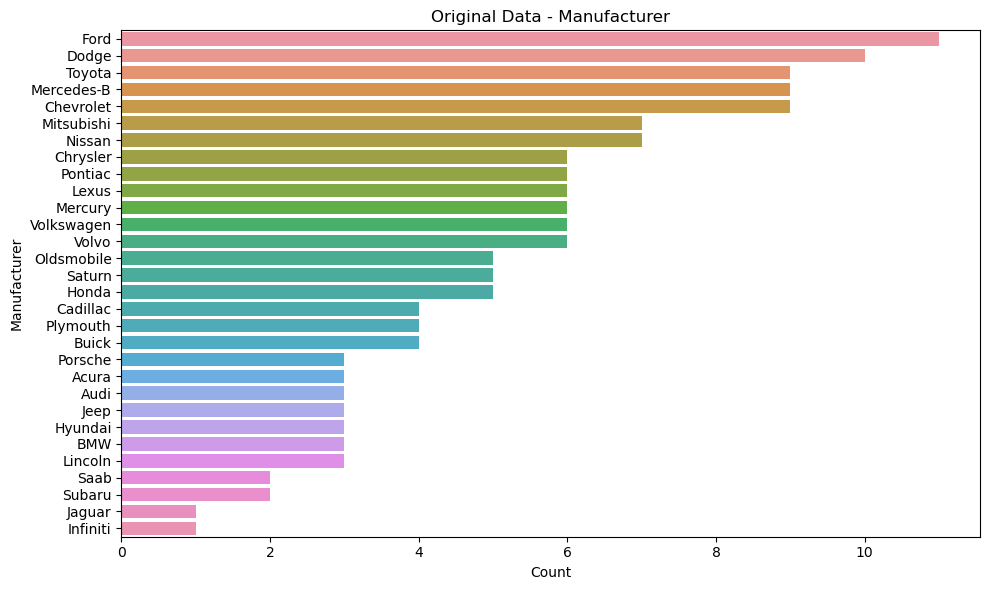

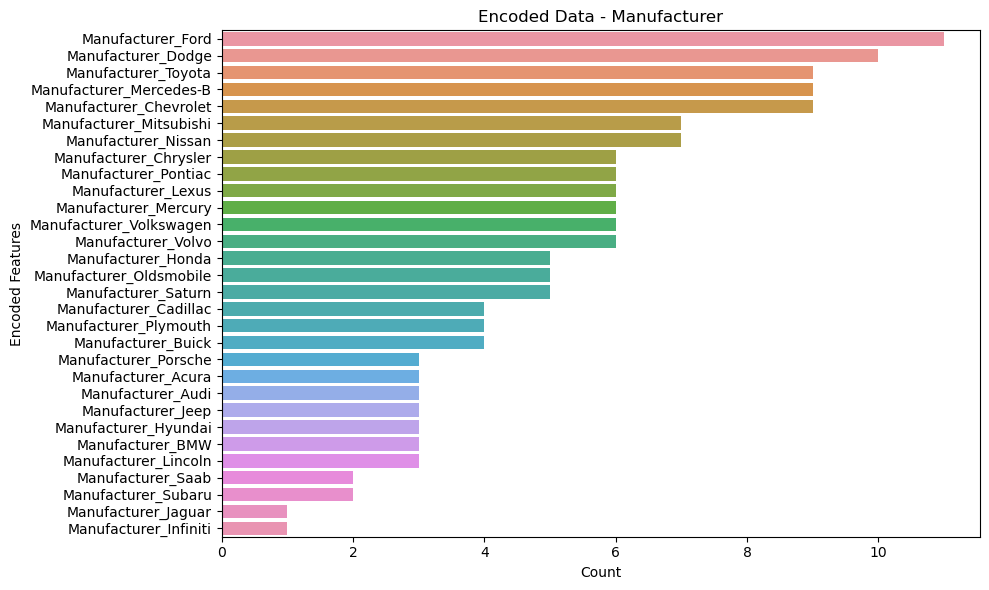

In [79]:
col = 'Manufacturer'
df[col] = data[col]

manufacturer_order = data[col].value_counts().index


plt.figure(figsize=(10, 6))
sns.countplot(y=col, data=data, order=manufacturer_order)
plt.title(f'Original Data - {col}')
plt.xlabel('Count')
plt.ylabel(col)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
encoded_features = [c for c in df.columns if c.startswith(col+'_')]
df_sum_encoded = df[encoded_features].sum().sort_values(ascending=False)
sns.barplot(x=df_sum_encoded.values, y=df_sum_encoded.index)
plt.title(f'Encoded Data - {col}')
plt.xlabel('Count')
plt.ylabel('Encoded Features')
plt.tight_layout()
plt.show()

# 2. Data Visualization

### Correlation matrix

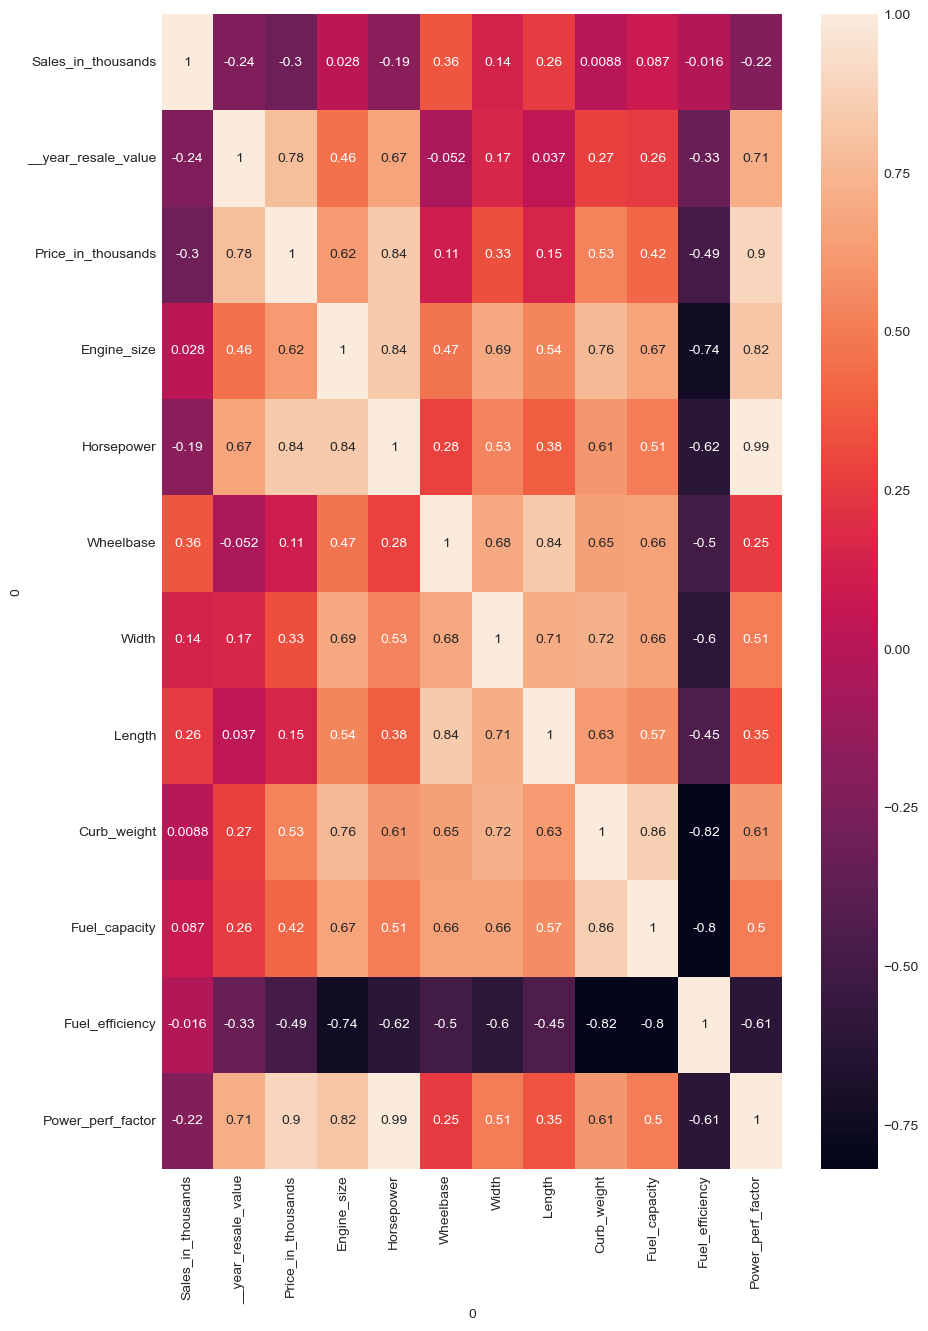

In [119]:
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(10,15))
sns.heatmap(corr_matrix, annot=True);

Engine size, horsepower, and performance factor are closely linked to a car's price. The bigger or more powerful the engine, or the better the performance, the higher the price usually is. These aspects are key indicators that can help predict a car's price.

For features like wheelbase, width, length, and curb weight, there's a moderately strong link to the price. Generally, bigger and heavier cars, which have larger dimensions, are more costly.

The car's fuel capacity also relates to its price, but the connection is moderate. Cars with larger fuel tanks often fall into the larger or high-performance category, which usually means they're pricier.

Interestingly, fuel efficiency is moderately inversely related to price. More fuel-efficient cars tend to be cheaper, but this might be affected by other factors like the car's size or type.

Lastly, sales numbers and resale value don't show a strong link to the initial price. This indicates that the number of sales or the value of the car when resold doesn't necessarily relate straightforwardly to its original price, or the relationship could vary in different ways.

### Total Sales per Manufacture

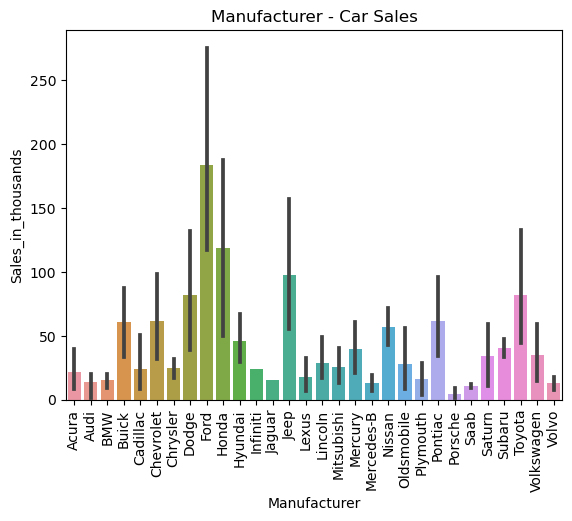

In [70]:
sns.barplot(x='Manufacturer', y='Sales_in_thousands', data=data)
plt.title('Manufacturer - Car Sales')
plt.xlabel('Manufacturer')
plt.ylabel('Sales_in_thousands')
plt.xticks(rotation=90)
plt.show()

### Total Sales Per Vechicle Type

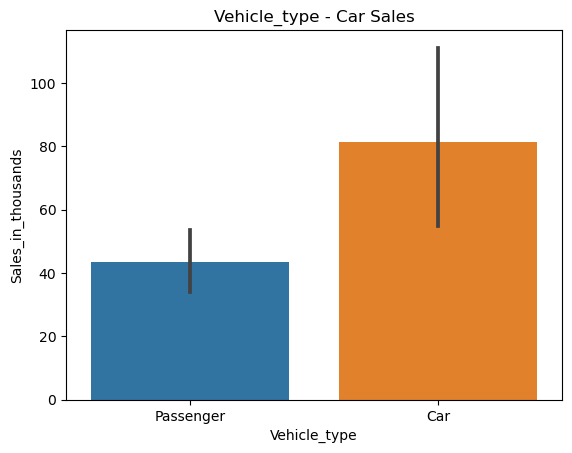

In [71]:
sns.barplot(x='Vehicle_type', y='Sales_in_thousands', data=data
plt.title('Vehicle_type - Car Sales')
plt.xlabel('Vehicle_type')
plt.ylabel('Sales_in_thousands')
plt.show()

# 3. Modeling

-We want to predict the price_in_thousands, which serves as our target variable in the dataset.

-We use the scikit-learn library to try several algorithms, change the hyper parameters, do a grid search, compare the results of our models using graphics

 - RandomForestRegressor
 - SVR
-For each model, we will assess and compare the following metrics.

Metrics comparison:
 - R2
 - RMSE



## Split the Data into Training and Testing Sets

In [65]:
from sklearn.model_selection import train_test_split
X = df.drop(['Price_in_thousands', 'Latest_Launch'], axis=1)  
y = df['Price_in_thousands']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Random Forest Regressor

### import libraries

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Grid Search for Hyperparameter Tuning

In [89]:
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [10, 20, 30],  
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')


grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': 30, 'n_estimators': 100}


### Create and Train the Best RandomForestRegressor Model

In [90]:
best_model_RandomForestRegressor = RandomForestRegressor(**best_params)
best_model_RandomForestRegressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=30)

### Model Evaluation

In [91]:
y_pred_rfr = best_model_RandomForestRegressor.predict(X_test)

### Regression Metrics

In [92]:
mse = mean_squared_error(y_test, y_pred_rfr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rfr)

print("Root Mean Squared Error (RandomForestRegressor):", rmse)
print("R-squared (RandomForestRegressor):", r2)

Root Mean Squared Error (RandomForestRegressor): 5.500149292121607
R-squared (RandomForestRegressor): 0.7442740374437234


### Scatter Plot for Actual vs. Predicted Values

To visually assess the performance of our regression model, we will generate a scatter plot illustrating the relationship between actual values and the predictions made by our model.

This graphical representation serves as a powerful tool to gauge how well our model aligns with the true values. Each point on the scatter plot corresponds to an observation in the dataset, with the x-axis representing the actual values and the y-axis representing the predicted values.

A well-fitted model would exhibit a pattern where points cluster closely along a diagonal line, indicating a strong correlation between predicted and actual values. Deviations from this line may highlight areas where our model may require further refinement.

Stay tuned as we unveil this visual representation, providing insights into the effectiveness of our regression model in capturing the underlying patterns within the data.


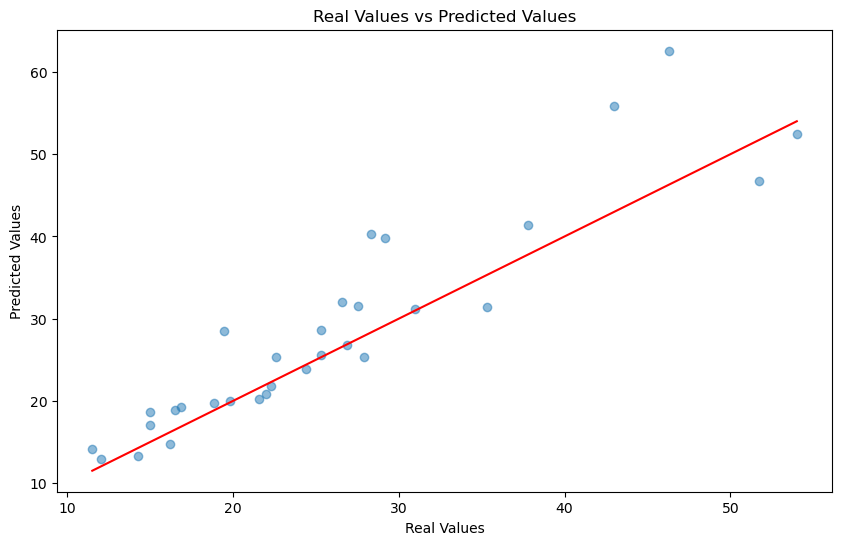

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rfr, alpha=0.5)
plt.title('Real Values vs Predicted Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Ligne parfaite
plt.show()


### Interpretation

- Linearity:
The red line shows a linear relationship with the real values. This suggests that the model used for predictions is likely a linear regression model.


- Prediction Quality: 
The scatter of blue points, which represent individual predictions, mostly clusters around the red line. This indicates that the model's predictions are reasonably close to the actual values for a substantial portion of the data, especially for lower values.


### Learning curve RandomForestRegressor

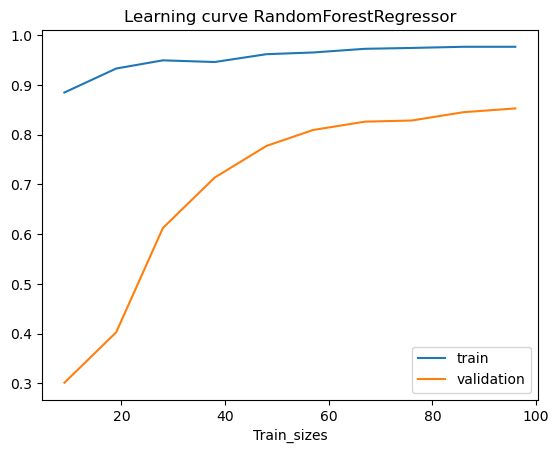

In [94]:
from sklearn.model_selection import learning_curve

N, train_scores, val_scores = learning_curve(best_model_RandomForestRegressor, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
plt.plot(N, train_scores.mean(axis=1), label="train")
plt.plot(N, val_scores.mean(axis=1), label="validation")
plt.xlabel("Train_sizes")
plt.legend()
plt.title("Learning curve RandomForestRegressor")
plt.show()

### Interpretation of the Learning Curve: RandomForestRegressor

The learning curve for the RandomForestRegressor exhibits distinctive characteristics in comparison to the previous analysis of the Support Vector Regressor (SVR):

#### High Training Score:
The training score initiates at a high level and maintains a relatively constant value as more training data is incorporated. This behavior is characteristic of the RandomForestRegressor, known for its capacity to fit well to training data by capturing intricate patterns.

#### Increasing Validation Score:
As the number of training examples grows, the validation score demonstrates an upward trend, indicating that the model is learning from the additional data. However, the rate of improvement appears to decrease with the inclusion of more data.

#### Large Gap Between Training and Validation Scores:
A noticeable gap exists between the training and validation scores. This discrepancy suggests a potential issue of overfitting, where the model may be capturing patterns specific to the training data that do not generalize effectively to unseen data.

#### No Sign of Plateau in Validation Score:
Unlike the SVR analysis, the validation score does not show signs of plateauing within the provided range of training sizes. This implies that the addition of more training data might continue to enhance the model's performance on unseen data.

This comprehensive assessment provides valuable insights into the behavior of the RandomForestRegressor, guiding potential adjustments and optimizations in our modeling approach.

## SVR

### import libraries

In [95]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

### Grid Search for Hyperparameter Tuning

In [106]:
param_grid_svr = {
    'C': [0.1, 1, 10, 100],  
    'gamma': ['scale', 'auto'],  
    'kernel': ['rbf', 'linear', 'poly']  
}

grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train, y_train)

best_params_svr = grid_search_svr.best_params_
print("Best hyperparameters SVR:", best_params_svr)



Best hyperparameters SVR: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


### Create and Train the Best SVR Model

In [97]:
best_model_svr = SVR(**best_params_svr)
best_model_svr.fit(X_train, y_train)

SVR(C=1, kernel='linear')

### Model Evaluation

In [98]:
y_pred_svr = best_model_svr.predict(X_test)

### Regression Metrics

In [99]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Root Mean Squared Error (SVR):", rmse_svr)
print("R-squared (SVR):", r2_svr)

Root Mean Squared Error (SVR): 0.06883855913188511
R-squared (SVR): 0.9999599419864361


### Scatter plot

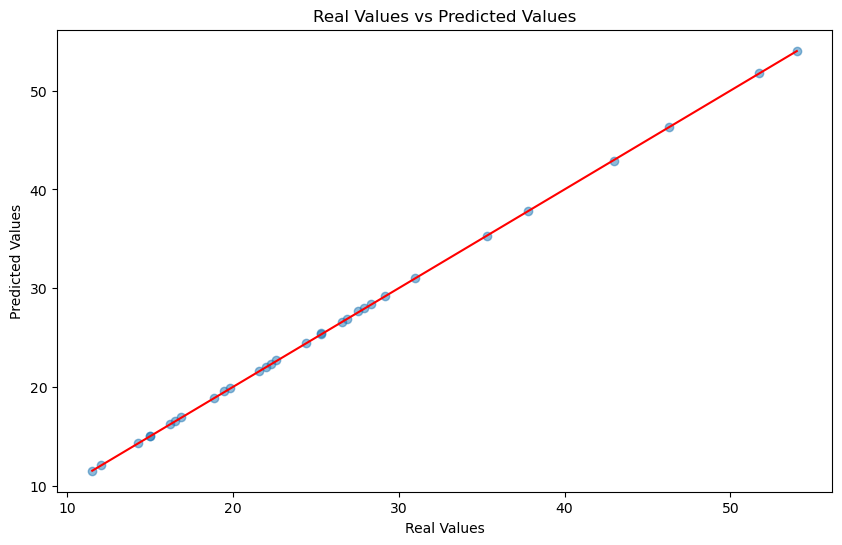

In [102]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.title('Real Values vs Predicted Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Ligne parfaite
plt.show()

### Interpretation

- Tight Correlation: 

The red line, likely representing the regression line, closely aligns with the blue data points which symbolize individual predictions. This indicates a very tight linear correlation between the predicted and real values.

- High Accuracy: 

The proximity of the data points to the regression line suggests that the model has a high degree of accuracy

- Potential Overfitting: 

The close fit to the data points might also raise a question about overfitting. 


### Learning curve SVR

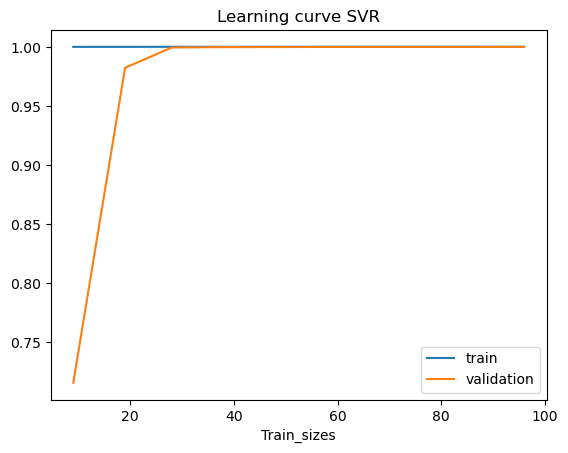

In [101]:
from sklearn.model_selection import learning_curve

N, train_scores, val_scores = learning_curve(best_model_svr, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
plt.plot(N, train_scores.mean(axis=1), label="train")
plt.plot(N, val_scores.mean(axis=1), label="validation")
plt.xlabel("Train_sizes")
plt.legend()
plt.title("Learning curve SVR")
plt.show()

### Interpretation of the Learning Curve

#### High Initial Score:
The initial high score on the training data, even with a small number of training examples, is expected. A model can easily memorize a limited dataset, resulting in high performance on the training set.

#### Convergence of Training and Validation Scores:
The diminishing training score and increasing validation score as more data is added indicate positive generalization. The model is effectively learning from additional data, leading to improved predictions on unseen data. The convergence of scores suggests a robust model capable of adapting to new information.

#### Plateau:
The plateauing of both training and validation scores after a certain point implies that further data additions may yield marginal improvements. The model has reached a saturation point, learning as much as possible about the data, and additional data may have limited impact on performance.

#### Small Gap Between Training and Validation:
The minimal gap between training and validation scores towards the end of the curve suggests that the model is not overfitting. Overfitting, characterized by a significant gap, is absent, indicating that the model's performance on unseen data is likely to be consistent with its training performance.

In summary, the learning curve portrays a well-fitted model with effective learning and generalization. The sustained high plateau in the validation score is a positive indicator, suggesting the model's potential to perform well on new, unseen data that shares similarities with the training and validation datasets.


# 4. Comparative Analysis of Model Performance Metrics

In [103]:
import pandas as pd

rmse_svr = 0.06883855913188511
r2_svr = 0.9999599419864361

rmse_rfr =  5.500149292121607
r2_rfr = 0.7442740374437234

metrics = {
    'Model': ['SVR', 'RandomForestRegressor'],
    'Root Mean Squared Error': [rmse_svr, rmse_rfr],
    'R-squared': [r2_svr, r2_rfr]
}

metrics_df = pd.DataFrame(metrics)

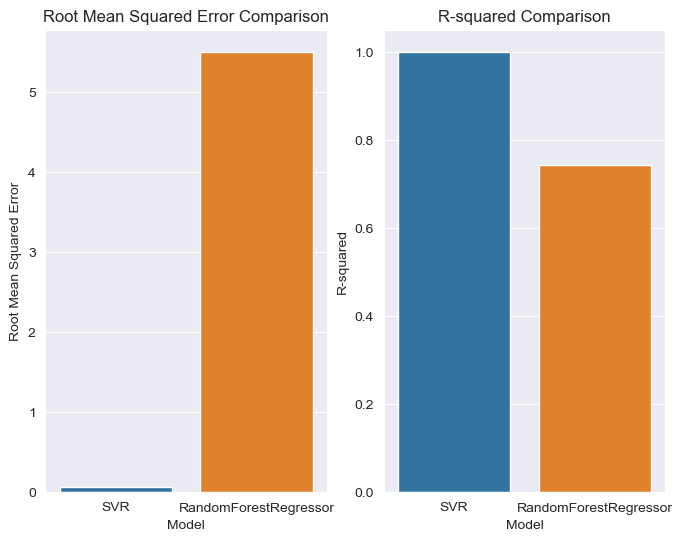

In [104]:
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))

sns.barplot(x='Model', y='Root Mean Squared Error', data=metrics_df, ax=axes[0])
axes[0].set_title('Root Mean Squared Error Comparison')

sns.barplot(x='Model', y='R-squared', data=metrics_df, ax=axes[1])
axes[1].set_title('R-squared Comparison')

plt.show()


### Comparison of SVR and RandomForestRegressor Predictions

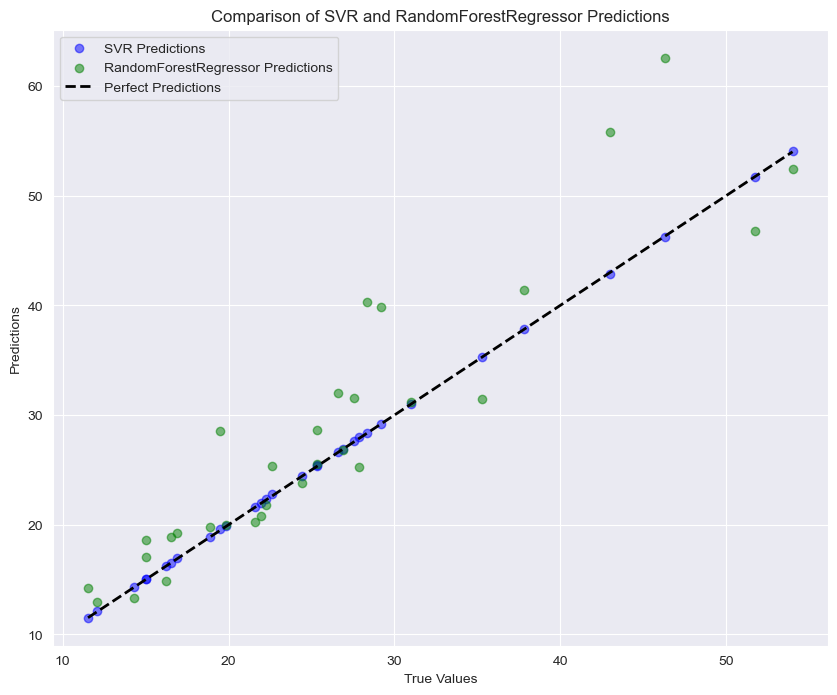

In [105]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred_svr, alpha=0.5, color='blue', label='SVR Predictions')

plt.scatter(y_test, y_pred_rfr, alpha=0.5, color='green', label='RandomForestRegressor Predictions')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Predictions')

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Comparison of SVR and RandomForestRegressor Predictions')
plt.legend()

plt.show()


# Conclusion

Based on the visualizations, the SVR model appears to outperform the Random Forest Regressor in terms of accuracy and the ability to capture the variance of the test data. The predictions from the SVR are closer to the actual values and exhibit a lower mean squared error, as indicated by a lower RMSE and an R² closer to 1. This suggests that SVR might be the preferred model for this specific dataset.